Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique used to determine the sentiment or emotional tone of a given text. It involves analyzing and categorizing text data to identify whether the expressed sentiment is positive, negative, or neutral.

The goal of sentiment analysis is to extract subjective information from text and understand the overall sentiment or opinion expressed by the author.

### **Overview of Sentiment Analysis**-
1) Text Preprocessing

2) Feature Extraction

3) Sentiment Classification

4) Model Evaluation

5) Sentiment Prediction

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,roc_auc_score,average_precision_score,precision_recall_curve
from inspect import signature


In [2]:
reviews_df = pd.read_csv('Hotel_Reviews.csv')
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
reviews_df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000
mean,826.241855,8.207472,22.464599,3675.658051,19.177788,5.993891,8.213205,51.543172,0.197917
std,356.682278,0.524179,33.338432,1471.668939,23.001567,9.277814,1.717483,0.321662,1.248899
min,13.000000,7.200000,0.000000,171.000000,0.000000,1.000000,2.500000,48.874348,-0.194971
25%,639.000000,7.700000,2.000000,2619.000000,6.000000,1.000000,7.100000,51.501400,-0.180903
50%,724.000000,8.000000,12.000000,3150.000000,12.000000,3.000000,8.800000,51.514218,-0.125160
75%,1058.000000,8.500000,30.000000,4380.000000,25.000000,7.000000,9.600000,51.522622,-0.116009
max,1322.000000,9.200000,397.000000,6117.000000,373.000000,158.000000,10.000000,52.360576,4.915968


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6385 entries, 0 to 6384
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               6385 non-null   object 
 1   Additional_Number_of_Scoring                6384 non-null   float64
 2   Review_Date                                 6384 non-null   object 
 3   Average_Score                               6384 non-null   float64
 4   Hotel_Name                                  6384 non-null   object 
 5   Reviewer_Nationality                        6384 non-null   object 
 6   Negative_Review                             6384 non-null   object 
 7   Review_Total_Negative_Word_Counts           6384 non-null   float64
 8   Total_Number_of_Reviews                     6384 non-null   float64
 9   Positive_Review                             6384 non-null   object 
 10  Review_Total

### **Text Preprocessing and Feature Extraction** -

The text data is preprocessed to remove irrelevant information, such as special characters, punctuation, and stopwords. This step often involves lowercasing the text, tokenizing it into individual words, and applying techniques like stemming or lemmatization to reduce word variations.

Relevant features are extracted from the preprocessed text to represent the sentiment. This can include bag-of-words representations, n-grams, word embeddings, or other numerical representations that capture the contextual meaning of the text.

In [5]:
reviews_df["reviews"] = reviews_df["Positive_Review"] + reviews_df["Negative_Review"]
reviews_df["is_bad"] = reviews_df["Reviewer_Score"].apply(lambda x:1 if x<5 else 0)
new_reviews_df = reviews_df[["reviews","is_bad"]]

In [6]:
new_reviews_df.head()

,reviews,is_bad
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,0
2,Location was good and staff were ok It is cut...,0
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic settin...,0


In [7]:
new_reviews_df = new_reviews_df.sample(frac = 0.2, replace = False, random_state = 0)

In [8]:
new_reviews_df["reviews"] = new_reviews_df["reviews"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))
new_reviews_df

,reviews,is_bad
5409,The bed was very comfortable and our room ver...,0
1314,Really good located close to musical Area and...,0
1422,The staff were super friendly and helpful the...,0
1687,Very good hotel lovely room lovely shower Th...,0
3603,Area was good Room was shabby and not very clean,0
...,...,...
1965,Stylish decor great staff Super food A littl...,0
3243,The staff were very pleasant The room s were...,0
5254,Need painting bit dated,0
3485,Service and hospitality No parking area and s...,0


In [9]:
new_reviews_df["is_bad"].unique()

array([0, 1])

In [10]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    text = text.lower() # lower text
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
new_reviews_df["cleaned_reviews"] = new_reviews_df["reviews"].apply(lambda x: clean_text(x))

In [13]:
new_reviews_df.head()

,reviews,is_bad,cleaned_reviews
5409,The bed was very comfortable and our room ver...,0,bed comfortable room spacious arrive early fli...
1314,Really good located close to musical Area and...,0,really good locate close musical area st paul ...
1422,The staff were super friendly and helpful the...,0,staff super friendly helpful location room ama...
1687,Very good hotel lovely room lovely shower Th...,0,good hotel lovely room lovely shower price res...
3603,Area was good Room was shabby and not very clean,0,area good room shabby clean


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stmt_analyzer = SentimentIntensityAnalyzer()
new_reviews_df["sentiments"] = new_reviews_df["reviews"].apply(lambda x: stmt_analyzer.polarity_scores(x))


Using Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 values:

1)a neutrality score
2)a positivity score
3)a negativity score
4)an overall score that summarizes the previous scores

In [15]:
new_reviews_df

,reviews,is_bad,cleaned_reviews,sentiments
5409,The bed was very comfortable and our room ver...,0,bed comfortable room spacious arrive early fli...,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp..."
1314,Really good located close to musical Area and...,0,really good locate close musical area st paul ...,"{'neg': 0.047, 'neu': 0.773, 'pos': 0.18, 'com..."
1422,The staff were super friendly and helpful the...,0,staff super friendly helpful location room ama...,"{'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'comp..."
1687,Very good hotel lovely room lovely shower Th...,0,good hotel lovely room lovely shower price res...,"{'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'comp..."
3603,Area was good Room was shabby and not very clean,0,area good room shabby clean,"{'neg': 0.185, 'neu': 0.598, 'pos': 0.217, 'co..."
...,...,...,...,...
1965,Stylish decor great staff Super food A littl...,0,stylish decor great staff super food little pr...,"{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'comp..."
3243,The staff were very pleasant The room s were...,0,staff pleasant room small dark panel make feel...,"{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp..."
5254,Need painting bit dated,0,need paint bit dated,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3485,Service and hospitality No parking area and s...,0,service hospitality park area small room,"{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp..."


In [16]:
new_reviews_df= pd.concat([new_reviews_df.drop(['sentiments'], axis=1), new_reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [17]:
new_reviews_df.head(10)

,reviews,is_bad,cleaned_reviews,neg,neu,pos,compound
5409,The bed was very comfortable and our room ver...,0,bed comfortable room spacious arrive early fli...,0.000,0.891,0.109,0.8199
1314,Really good located close to musical Area and...,0,really good locate close musical area st paul ...,0.047,0.773,0.180,0.7134
1422,The staff were super friendly and helpful the...,0,staff super friendly helpful location room ama...,0.000,0.445,0.555,0.9287
1687,Very good hotel lovely room lovely shower Th...,0,good hotel lovely room lovely shower price res...,0.000,0.493,0.507,0.9066
3603,Area was good Room was shabby and not very clean,0,area good room shabby clean,0.185,0.598,0.217,0.1091
3647,The birthday surprise red wine card chocolate...,0,birthday surprise red wine card chocolates sea...,0.000,0.734,0.266,0.7003
4592,Location was wonderful Property was beautiful...,0,location wonderful property beautiful staff he...,0.143,0.519,0.338,0.7906
3192,Not very modern,0,modern,0.000,1.000,0.000,0.0000
1815,Great location for theatre well fitted great ...,0,great location theatre well fitted great staff...,0.000,0.466,0.534,0.8834
539,Great selection for breakfast buffet Hotel lo...,0,great selection breakfast buffet hotel locatio...,0.000,0.740,0.260,0.9371


In [18]:
# add number of characters column
new_reviews_df["n_char"] = new_reviews_df["reviews"].apply(lambda x: len(x))

# add number of words column
new_reviews_df["n_word"] = new_reviews_df["reviews"].apply(lambda x: len(x.split(" ")))

Adding number of words and number of characters columns for the reviews

In [19]:
new_reviews_df.head(10)

,reviews,is_bad,cleaned_reviews,neg,neu,pos,compound,n_char,n_word
5409,The bed was very comfortable and our room ver...,0,bed comfortable room spacious arrive early fli...,0.000,0.891,0.109,0.8199,495,97
1314,Really good located close to musical Area and...,0,really good locate close musical area st paul ...,0.047,0.773,0.180,0.7134,319,56
1422,The staff were super friendly and helpful the...,0,staff super friendly helpful location room ama...,0.000,0.445,0.555,0.9287,88,16
1687,Very good hotel lovely room lovely shower Th...,0,good hotel lovely room lovely shower price res...,0.000,0.493,0.507,0.9066,83,17
3603,Area was good Room was shabby and not very clean,0,area good room shabby clean,0.185,0.598,0.217,0.1091,49,11
3647,The birthday surprise red wine card chocolate...,0,birthday surprise red wine card chocolates sea...,0.000,0.734,0.266,0.7003,111,22
4592,Location was wonderful Property was beautiful...,0,location wonderful property beautiful staff he...,0.143,0.519,0.338,0.7906,142,26
3192,Not very modern,0,modern,0.000,1.000,0.000,0.0000,16,4
1815,Great location for theatre well fitted great ...,0,great location theatre well fitted great staff...,0.000,0.466,0.534,0.8834,74,14
539,Great selection for breakfast buffet Hotel lo...,0,great selection breakfast buffet hotel locatio...,0.000,0.740,0.260,0.9371,284,50


In [20]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(new_reviews_df["cleaned_reviews"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = new_reviews_df["cleaned_reviews"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
new_reviews_df = pd.concat([new_reviews_df, doc2vec_df], axis=1)

In [21]:
new_reviews_df.head(10)

,reviews,is_bad,cleaned_reviews,neg,neu,pos,compound,n_char,n_word,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
5409,The bed was very comfortable and our room ver...,0,bed comfortable room spacious arrive early fli...,0.000,0.891,0.109,0.8199,495,97,0.119159,0.308367,0.162942,-0.324706,-0.076968
1314,Really good located close to musical Area and...,0,really good locate close musical area st paul ...,0.047,0.773,0.180,0.7134,319,56,0.306978,0.852411,0.496337,-0.469397,-0.105916
1422,The staff were super friendly and helpful the...,0,staff super friendly helpful location room ama...,0.000,0.445,0.555,0.9287,88,16,-0.050275,-0.017042,0.082464,-0.068394,-0.084180
1687,Very good hotel lovely room lovely shower Th...,0,good hotel lovely room lovely shower price res...,0.000,0.493,0.507,0.9066,83,17,-0.004133,-0.068891,-0.102657,0.004044,-0.019077
3603,Area was good Room was shabby and not very clean,0,area good room shabby clean,0.185,0.598,0.217,0.1091,49,11,-0.013901,-0.008734,0.148828,0.062480,-0.097659
3647,The birthday surprise red wine card chocolate...,0,birthday surprise red wine card chocolates sea...,0.000,0.734,0.266,0.7003,111,22,0.230365,0.321235,0.397824,-0.166291,-0.173287
4592,Location was wonderful Property was beautiful...,0,location wonderful property beautiful staff he...,0.143,0.519,0.338,0.7906,142,26,0.155700,0.427515,0.418866,-0.226971,-0.063335
3192,Not very modern,0,modern,0.000,1.000,0.000,0.0000,16,4,-0.018968,0.052260,0.035460,-0.067370,-0.038021
1815,Great location for theatre well fitted great ...,0,great location theatre well fitted great staff...,0.000,0.466,0.534,0.8834,74,14,0.024112,0.214343,0.120854,0.002116,-0.013244
539,Great selection for breakfast buffet Hotel lo...,0,great selection breakfast buffet hotel locatio...,0.000,0.740,0.260,0.9371,284,50,0.078021,0.366416,0.234040,-0.199398,-0.152745


The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features. We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [22]:
# add tf-idfs columns
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(new_reviews_df["cleaned_reviews"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = new_reviews_df.index
new_reviews_df = pd.concat([new_reviews_df, tfidf_df], axis=1)

In [23]:
new_reviews_df.head(10)

,reviews,is_bad,cleaned_reviews,neg,neu,pos,compound,n_char,n_word,doc2vec_vector_0,...,word_window,word_wine,word_wish,word_within,word_without,word_wonderful,word_work,word_worth,word_would,word_year
5409,The bed was very comfortable and our room ver...,0,bed comfortable room spacious arrive early fli...,0.000,0.891,0.109,0.8199,495,97,0.119159,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.144558,0.0,0.124749,0.0
1314,Really good located close to musical Area and...,0,really good locate close musical area st paul ...,0.047,0.773,0.180,0.7134,319,56,0.306978,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1422,The staff were super friendly and helpful the...,0,staff super friendly helpful location room ama...,0.000,0.445,0.555,0.9287,88,16,-0.050275,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1687,Very good hotel lovely room lovely shower Th...,0,good hotel lovely room lovely shower price res...,0.000,0.493,0.507,0.9066,83,17,-0.004133,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3603,Area was good Room was shabby and not very clean,0,area good room shabby clean,0.185,0.598,0.217,0.1091,49,11,-0.013901,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3647,The birthday surprise red wine card chocolate...,0,birthday surprise red wine card chocolates sea...,0.000,0.734,0.266,0.7003,111,22,0.230365,...,0.0,0.400783,0.0,0.0,0.0,0.400783,0.000000,0.0,0.000000,0.0
4592,Location was wonderful Property was beautiful...,0,location wonderful property beautiful staff he...,0.143,0.519,0.338,0.7906,142,26,0.155700,...,0.0,0.000000,0.0,0.0,0.0,0.492849,0.000000,0.0,0.000000,0.0
3192,Not very modern,0,modern,0.000,1.000,0.000,0.0000,16,4,-0.018968,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1815,Great location for theatre well fitted great ...,0,great location theatre well fitted great staff...,0.000,0.466,0.534,0.8834,74,14,0.024112,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
539,Great selection for breakfast buffet Hotel lo...,0,great selection breakfast buffet hotel locatio...,0.000,0.740,0.260,0.9371,284,50,0.078021,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0



Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:

1)TF computes the classic number of times the word appears in the text

2)IDF computes the relative importance of this word which depends on how many texts the word can be found

In [24]:
new_reviews_df["is_bad"].value_counts()

0    1203
1      74
Name: is_bad, dtype: int64

In [25]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

In [26]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        #background_color = 'salmon',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 0
    ).generate(str(data))

    fig = plt.figure(1, figsize = (300, 200))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(new_reviews_df["reviews"])

In [30]:
new_reviews_df[new_reviews_df["n_word"] >= 5].sort_values("pos", ascending = False)[["reviews", "pos"]].head(5)

,reviews,pos
2842,Friendly helpful staff N a,0.857
3562,Comfortable clean friendly breakfast was good...,0.832
4598,Excellent location and good value,0.818
1746,Great location great staff great facilities,0.804
965,Friendly staff great breakfast,0.785


In [31]:
new_reviews_df[new_reviews_df["n_word"] >= 5].sort_values("pos", ascending = False)[["reviews", "neg"]].head(5)

,reviews,neg
2842,Friendly helpful staff N a,0.0
3562,Comfortable clean friendly breakfast was good...,0.0
4598,Excellent location and good value,0.0
1746,Great location great staff great facilities,0.0
965,Friendly staff great breakfast,0.0


<ipython-input-32-abfae35689dd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
<ipython-input-32-abfae35689dd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)


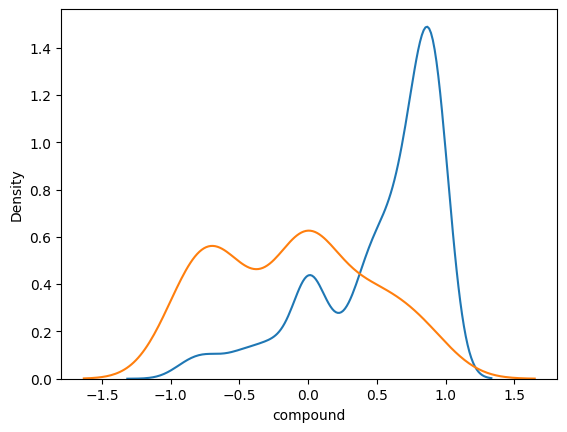

In [32]:
for x in [0, 1]:
    subset = new_reviews_df[new_reviews_df['is_bad'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

Vader sometimes interpret 'no' or 'nothing' as negative words whereas they are sometimes used to say that there were no problems with the hotel. However, most of the reviews are bad ones.

### **Sentiment Classification-**

In [33]:
label = "is_bad"
ignore_cols = [label, "reviews", "cleaned_reviews"]
features = [c for c in new_reviews_df.columns if c not in ignore_cols]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(new_reviews_df[features], new_reviews_df[label], test_size = 0.20, random_state =0)

In [34]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.036439
9,doc2vec_vector_3,0.029316
2,pos,0.028079
6,doc2vec_vector_0,0.026406
8,doc2vec_vector_2,0.025599
10,doc2vec_vector_4,0.025074
4,n_char,0.023544
342,word_room,0.022843
354,word_service,0.020416
1,neu,0.019824


Using Random Classifier for the predictions

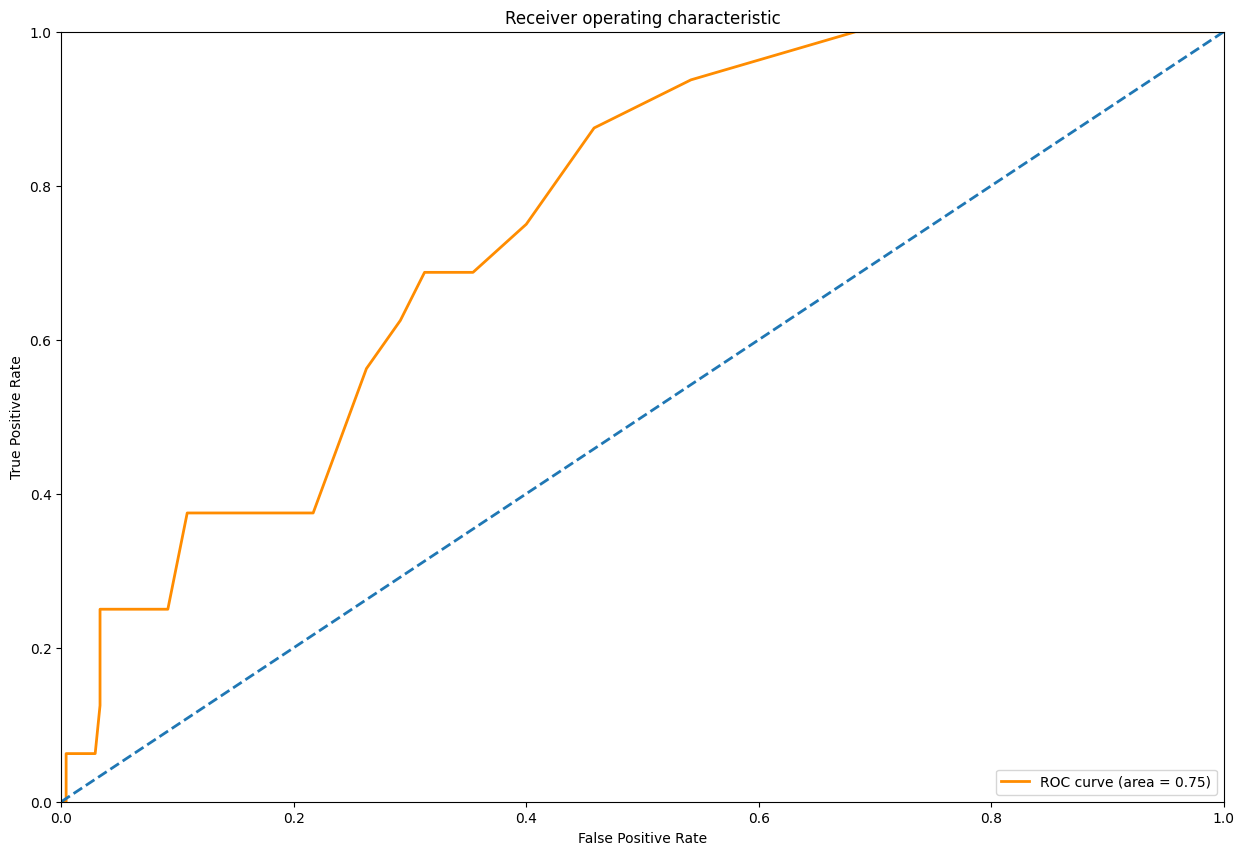

In [35]:
y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the AUC ROC (Area Under the Curve ROC) is very good, we should not use here the ROC curve to assess the quality of our model.

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.18')

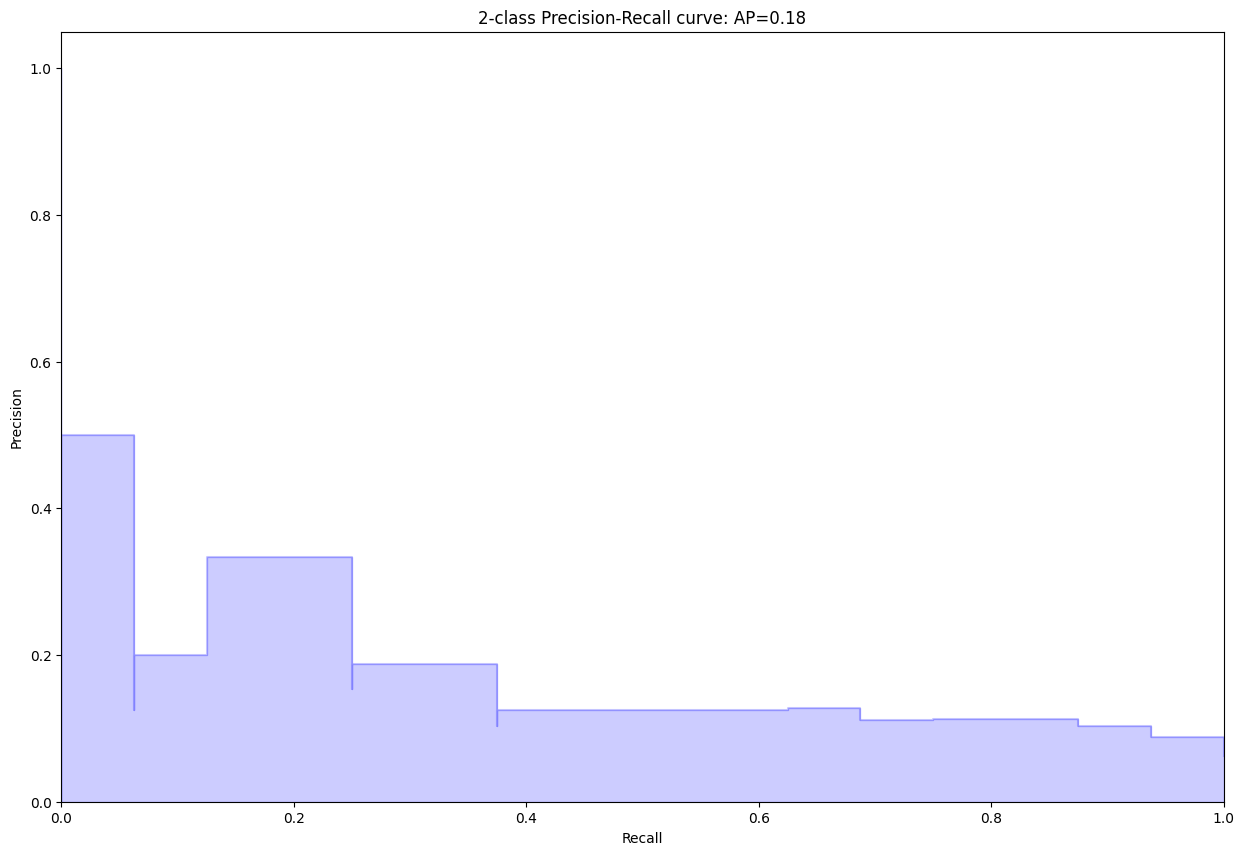

In [36]:
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

A better metric in this imbalanced situation is the AUC PR (Area Under the Curve Precision Recall), or also called AP (Average Precision).

We can see that the precision decreases when we increase the recall. This shows us that we have to choose a prediction thresold adapted to our needs. If our goal is to have a high recall, we should set a low prediction thresold that will allow us to detect most of the observations of the positive class, but with a low precision. On the contrary, if we want to be really confident about our predictions but don't mind about not finding all the positive observations, we should set a high thresold that will get us a high precision and a low recall.